# Homework Assignment 2

Due February 14th at **10am**.  The pre-grading script should be up and running by Friday afternoon and will give you feedback in the **Task 5** item.  A note will be posted on CourseSpaces once the script is running.  Please save your assignment notebook in your **mp248** repo as **mp248/Assignment.2/Assignment.2.ipynb**. 


## P1: Quiz 2, extended. 

In this problem we ask you to extend your code from the second quiz. Recall the function

$$ f(n) = \left\{ \matrix{n/2 & if \ n \ even \cr 3n+1 & if \ n \ odd} \right.$$

In the quiz, we asked you to apply $f$ repeatedly to integer inputs and keep track of how many iterations it took until you found the integer $1$. 

Write some code that computes a **dictionary**, $L$, where $L[k]$ is the number of times one needs to apply $f$ to turn $k$ into $1$, eg: $L[1]=0$, $L[2]=1$.

Consider the function $T(k) = L[1] + L[2] + \cdots + L[k]$.   Make a plot of $T(k)$ for $k=1,2,3, \cdots, 10000$.  Do a least squares interpolation on this plot, for both (a) a linear and (b) a quadratic fitting.   Try it again on the plot for $k=1,2,3, \cdots, 100000$.  Does it look like the least squares fittings are converging?   Plot the data together with the least-squares interpolation.  Provide a suitable title and legend -- include the coefficients of the least-squares fitting in the legend.

For the purposes of the pre-grading script, print out the values of $T(10)$, $T(100)$, $T(1000)$, $T(10000)$, and $T(100000)$. Put the values in a 5-element list, and print out that list.

**Note**: We will discuss least squares in the Monday Feb. 11th class.

In [1]:
import sys

## A short-form version of f.
def f(n):
    return n//2 if n%2==0 else 3*n+1

## start our dictionary off computed by hand
L = {1:0, 2:1, 3:7, 4:2, 5:5, 6:8}

## this routine computes the collatz number for n, extending the
## precomputed list in the process. We make use of any pre-computed
## values stored in L.
def cCollatz(n):
    global L

    tList = [n]
    while tList[-1] not in L.keys():
        tList.append(f(tList[-1]))
        
    ## we know tList[-1] is in L
    tList = tList[::-1]
    c = L[tList[0]]
    for i in range(1, len(tList)):
        L[tList[i]]=c+i

## run this to ensure L is complete.
for i in range(1,10000000):
    cCollatz(i)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

Tl = [0]
for i in range(1, 10000000):
    Tl.append(Tl[-1] + L[i])
    

In [3]:
PL = [Tl[x] for x in [10,100,1000,10000, 100000]]
print(PL)


[67, 3142, 59542, 849666, 10753840]


In [4]:
def pltLinFit(M):
    A = np.matrix([[1.0, i] for i in range(1,M+1)]).T
    y = np.matrix([Tl[i] for i in range(1,M+1)]).T

    c = np.linalg.inv(A*A.T)*A*y
    print("%1.2f, %1.2f" % (c[0,0], c[1,0]), A.shape)

    plt.close()
    plt.title('Plot to %d' % M)
    plt.plot([i for i in range(1,M)], [Tl[i] for i in range(1,M)], 'ro', label='Collatz pts')
    plt.plot([1, M-1], [c[0,0]+c[1,0], c[0,0]+c[1,0]*(M-1)], color="black", label='y=%2.2fx+%2.2f' %(c[1,0], c[0,0]))
    plt.xlabel('$k$')
    plt.ylabel('$T(k)$')
    plt.legend()
    plt.show()
    

-36250.36, 86.69 (2, 10000)


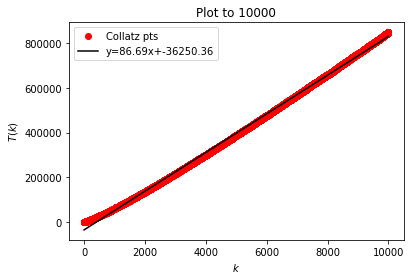

-332421.89, 109.12 (2, 100000)


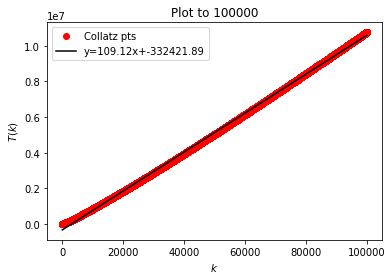

In [5]:
for x in [10000, 100000]:
    pltLinFit(x)

In [6]:
## quadratic fit 10000 pts
def pltQuadFit(M):
    A = np.matrix([[1.0, i, i**2] for i in range(1,M+1)]).T
    y = np.matrix([Tl[i] for i in range(1,M+1)]).T

    c = np.linalg.inv(A*A.T)*A*y
    print("%1.2f, %1.2f, %2.6f" % (c[0,0], c[1,0], c[2,0]), A.shape)

    plt.close()
    plt.title('Plot to %d' % M)
    plt.plot([i for i in range(1,M)], [Tl[i] for i in range(1,M)], 'ro', label='Collatz pts')
    dom = np.arange(1, M-1, 1)
    plt.plot(dom, [c[0,0]+c[1,0]*x+c[2,0]*x**2 for x in dom], color="black", label='y=%2.6fx^2+%2.2fx+%2.2f' %(c[2,0], c[1,0], c[0,0]))
    plt.xlabel('$k$')
    plt.ylabel('$T(k)$')
    plt.legend()
    plt.show()
 

-14036.63, 73.37, 0.001332 (3, 10000)


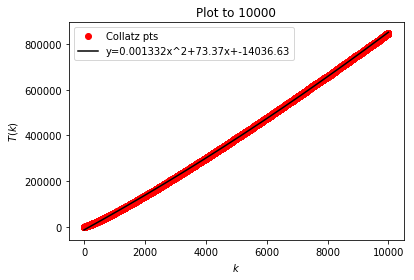

-119954.63, 96.38, 0.000127 (3, 100000)


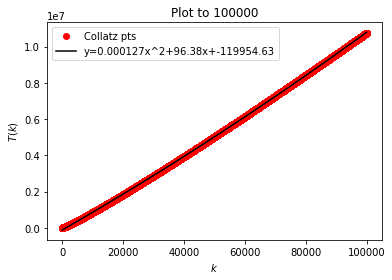

In [7]:
for x in [10000,100000]:
    pltQuadFit(x)

Clearly there is no apparent convergence.  Perhaps there is something closer to an exponential relationship?

* * *

## P2 : Simple Equation Solver

While Newton's method is an excellent way to solve equations, in practice there is a more reliable way to solve equations, called the **subdivision method**. 

The heart of the subdivision method is the **intermediate value theorem** which states that if a function $f: [a,b] \to \mathbb R$ is *continuous* then for any $y_0$ between $f(a)$ and $f(b)$ (not equal to $f(a)$ or $f(b)$), there exists $t_0 \in (a,b)$ with $f(t_0) = y_0$. This theorem is the inspiration for:

**The Subdivision method** for solving $f(t)=0$. 

Given a continuous function $f : [a,b] \to \mathbb R$ with $f(a)$ and $f(b)$ having opposite signs (in particular, not zero), let $t_0$ be the *mid-point* of the interval $[a,b]$ i.e. $t_0 = \frac{a+b}{2}$.  We know by the intermediate value theorem that $f(t)=0$ has a solution in the interval.  Moreover, if $f(t_0)$ has the same sign as $f(b)$, then by the intermediate value theorem, a solution *must be* in the interval $[a,t_0]$.  Similarly, if $f(t_0)$ has the same sign as $f(a)$, a solution *must be* in the interval $[t_0,b]$. 

The *subdivision method* is to repeat this process of replacing the interval $[a,b]$ by either $[a,t_0]$ or $[t_0,b]$ until your interval is shorter than your acceptable error in approximation. 

**The problem** Write a Python function *subdiv(f,x,a,b,eps)* that takes as input a sympy function $f$ with variable $x$, with left endpoint $a$ and right endpoint $b$. *eps* is your acceptable amount of error.  The function subdiv will iterate the subdivision method until the interval containing a root is shorter than *eps*.  The function will return the endpoints of the interval, together with the number of iterations.  Find the root of $x^x-2$ in the interval $[1,2]$.  Set $eps = \frac{1}{10^k}$ for $k=1,2,3,4,5,6$, printing the output of *subdiv* in each case.

**Hint** When solving for the root of $x^x-2$, using endpoints $1.0$ and $2.0$ with *eps=0.5*, *subdiv* should take only one iteration. Using *eps=1.0* it should take zero.



In [8]:
import numpy as np
import sympy as sp
x = sp.Symbol('x')

def subdiv(f,x,a,b,eps):
    F = sp.lambdify(x, f)
    ct = 0
    while (b-a)>eps:
        mp = (a+b)/2
        ct += 1
        fmp = F(mp)
        fa = F(a)
        fb = F(b)
        if np.sign(fa)==np.sign(fb):
            return("No root.")
        if np.sign(fmp)==np.sign(fa):
            a = mp
            continue
        b = mp
    return a,b, ct


f = x**x - 2
for k in [1,2,3,4,5,6]:
    print(subdiv(f, x, 1.0, 2.0, 1/10**k))


(1.5, 1.5625, 4)
(1.5546875, 1.5625, 7)
(1.5595703125, 1.560546875, 10)
(1.5595703125, 1.55963134765625, 14)
(1.5596084594726562, 1.5596160888671875, 17)
(1.559610366821289, 1.5596113204956055, 20)


## P3: Extended Newton method example.

Recall Newton's method for finding the roots of $z^3-1$.  The iterator is

$$N(z) = z-\frac{f(z)}{f'(z)} = z - \frac{z^3-1}{3z^2} = \frac{2z^3+1}{3z^2}$$

In this problem we ask you to use Sympy to find the points in the plane where Newton's method eventually fails, i.e. find all the initial 
conditions $z_0$ such that $N^{(k)}(z_0) = 0$ for some $k$.  Clearly, Newton's method fails for $z_0 = 0$, with $k=0$, i.e. it fails immediately.  We say Newton's method fails in one step if $N^{(1)}(z_0) = 0$, and two steps if $N^{(2)}(z_0)=0$, etc. 

Plot the points where Newton's method fails in $k$ steps for $k=0,1,2,3,4,\cdots, 10$.  Use a different color for each $k$. 

We denote the set where Newton's method fails in $k$ steps by $F_k$. 

$$F_0 = \{0\}$$

and

$$F_k = \{ z_0 : N(z_0) = \frac{2z_0^3+1}{3z_0^2} \in F_{k-1} \}$$

Thus, provided we know $F_{k-1}$ we can solve for $F_k$, as the solution set to the equation

$$ F_k = \{ z_0 : 2z_0^3+1 = 3f_{k-1}z_0^2, f_{k-1} \in F_{k-1} \}$$

$$F_k = \{ z_0 : 2z_0^3-3f_{k-1}z_0^2+1 = 0, f_{k-1} \in F_{k-1} \}$$

We can solve this equation exactly in closed form using Sympy -- you will likely find this slow. 

More pragmatically, we can solve it using complex floats with the [*mpmath*](http://mpmath.org/doc/current/calculus/polynomials.html) library. 

**Advice** Please use a careful choice of *markersize* in your point plot so that you can see the underlying shape of the scatter plot. i.e. try to avoid big points crowding each other out. Also set *figsize* to (12,12), to ensure your plot is reasonably large.

**Advice** Choose your *xlim* and *ylim* so that your image $x$ and $y$ coordinates vary between $-2$ and $2$. As you will see, there *are* solutions outside of this square, but they are rather rare, and having them in the plot wrecks the scale.

Use **%matplotlib inline** to ensure your plots are saved in your notebook.  

In [8]:
import mpmath as mp
import collections as co

rDict = co.defaultdict(set)
rDict[0] = {0}

## takes as input the previos roots, returns the next
## i.e. develops Fk from Fk-1
def devRoots(PR):
    rv = set()
    for f in PR:  ## 2*z**3-3*f*z**2+1
        for p in mp.polyroots([2, -3*f, 0, 1]):
            rv.add(p)
    return(rv)

for i in range(10):
    rDict[i+1] = devRoots(rDict[i])
    

In [9]:
print(type(mp.mpc(1.0+2.0j)))

<class 'mpmath.ctx_mp_python.mpc'>


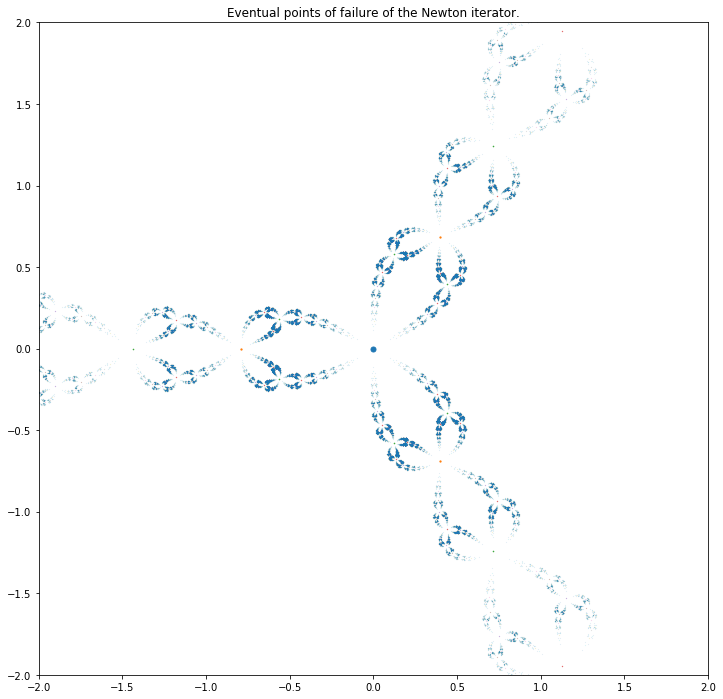

In [10]:
fig, ax = plt.subplots(figsize=(12,12))
plt.xlim(-2,2)
plt.ylim(-2,2)
for i,S in rDict.items():
    plt.plot([x.real for x in S], [x.imag for x in S], '.', markersize=10/(i+1)**2 )
plt.title("Eventual points of failure of the Newton iterator.")
## this command allows us to save the plot to a file
plt.savefig('P3.png')

## P4: Doubling roots

Recall our *doubling function* $f$ from the start of the Sympy notebook (7).   One way to express it is via the floor function $\lfloor x \rfloor$ 

$$f(x) = 2x - \lfloor 2x \rfloor.$$

The floor function $\lfloor x \rfloor$ is the largest integer $k$ with $k \leq x$.  

Using Python and the Sympy library, compute the iterates $f^{(k)}(\sqrt{2})$ for $k=0,1,2,\cdots, 1000$.  By iterates we mean 
$$f^{(0)}(\sqrt{2}) = \sqrt{2}$$
$$f^{(1)}(\sqrt{2}) = f(\sqrt{2})$$
$$f^{(2)}(\sqrt{2}) = f(f(\sqrt{2}))$$ 
$$f^{(3)}(\sqrt{2}) = f(f(f(\sqrt{2})))$$

Verify that $f^{(i)}(\sqrt{2}) \neq f^{(j)}(\sqrt{2})$ if and only if $i = j$.

Using the sort function (**sorted**) linearize the iterates, i.e. compute a sequence $j_0, j_1, \cdots, j_{1000}$ such that

$$f^{(j_0)}(\sqrt{2}) < f^{(j_1)}(\sqrt{2}) < \cdots < f^{(j_{1000})}(\sqrt{2}).$$

Store the sequence $J = (j_0, j_1, \cdots, j_{1000})$ as a list, and print it.

**Note**: If Sympy's implementation of the inequality $<$ fails you, perhaps work around it creatively using *evalf*. 

If you have trouble answering this question for **1000** iterations, as asked, you will get partial credit for a correct answer for **200**, **400**, **600** or **800** iterations, respectively.  You will receive more partial credit the closer you are to **1000** points. But please do not answer this question for any other number of iterations as the pre-grading script will not look for that answer.   As a sanity check, note that any answer to this problem for **1000** iterations should be a list with **1001** elements.

In [12]:
import operator as op
import sympy as sp

## flexible version of the Collatz iterator that uses 
## evalf() to do comparisons to high resolution
def f(x, dec=20):
    x = 2*x
    while x.evalf(dec)>=1:
        x -= 1
    while x.evalf(dec)<0:
        x += 1
    return(x)

In [13]:
def printANS(n, dec=20):
    S=[sp.sqrt(2)]
    for i in range(n):
        S.append(f(S[-1], dec))

    Sc = [(S[i], S[i].evalf(dec), i) for i in range(len(S))]
    Sx = sorted(Sc, key=op.itemgetter(1))
    print("Ans for n==",n, "dec==",dec)
    print([x[2] for x in Sx])

In [14]:
## I suggest giving student 8/10 if they have a good solution that works for n=200 pts
## with no other mistakes
printANS(200, 20)

Ans for n== 200 dec== 20
[7, 146, 56, 180, 8, 147, 57, 160, 181, 80, 9, 61, 148, 199, 127, 53, 58, 50, 161, 182, 81, 164, 10, 105, 62, 149, 200, 68, 46, 19, 185, 23, 84, 91, 128, 189, 167, 36, 13, 120, 27, 5, 54, 178, 158, 59, 197, 51, 162, 103, 183, 82, 165, 11, 118, 3, 176, 156, 101, 99, 106, 108, 63, 133, 150, 110, 69, 143, 77, 47, 65, 20, 88, 186, 24, 194, 85, 92, 135, 172, 152, 95, 129, 190, 168, 37, 41, 14, 138, 121, 112, 71, 28, 6, 145, 55, 179, 159, 79, 60, 198, 126, 52, 49, 163, 104, 67, 45, 18, 184, 22, 83, 90, 188, 166, 35, 12, 119, 26, 4, 177, 157, 196, 102, 117, 2, 175, 155, 100, 98, 107, 132, 109, 142, 76, 64, 87, 193, 134, 171, 151, 94, 40, 137, 111, 70, 144, 78, 125, 48, 66, 44, 17, 21, 89, 187, 34, 25, 195, 116, 1, 174, 154, 97, 131, 141, 75, 86, 192, 170, 93, 39, 136, 124, 43, 16, 33, 115, 173, 153, 96, 130, 140, 74, 191, 169, 38, 123, 42, 15, 32, 114, 139, 73, 122, 31, 113, 72, 30, 29, 0]


In [15]:
## 8.5/10 for a good 400 iteration solution
## I increase the precision until the permutation (list) stops changing.
printANS(400, 30)

Ans for n== 400 dec== 30
[279, 7, 146, 272, 224, 360, 280, 56, 180, 8, 216, 147, 273, 225, 313, 285, 361, 383, 281, 57, 160, 181, 80, 9, 300, 247, 217, 306, 324, 61, 148, 199, 274, 226, 314, 286, 127, 362, 384, 331, 269, 357, 53, 213, 282, 380, 244, 58, 50, 161, 182, 81, 164, 10, 301, 397, 248, 105, 257, 218, 307, 325, 62, 149, 200, 68, 275, 240, 46, 227, 19, 231, 185, 23, 84, 91, 342, 375, 235, 315, 287, 128, 189, 167, 36, 13, 363, 385, 120, 27, 332, 5, 270, 358, 54, 178, 214, 283, 381, 158, 245, 304, 322, 59, 197, 51, 162, 395, 103, 255, 183, 82, 165, 11, 118, 3, 176, 400, 156, 302, 320, 101, 253, 398, 99, 251, 249, 106, 292, 108, 258, 219, 308, 326, 208, 63, 133, 294, 150, 201, 110, 69, 260, 276, 143, 221, 310, 77, 328, 210, 241, 47, 65, 228, 20, 88, 372, 232, 186, 24, 194, 85, 369, 92, 135, 343, 296, 353, 376, 236, 391, 172, 152, 316, 95, 288, 129, 190, 168, 37, 41, 14, 203, 138, 364, 386, 121, 112, 71, 262, 346, 28, 333, 278, 6, 145, 271, 223, 359, 55, 179, 215, 312, 284, 382, 159

In [16]:
## 9/10 for a good 600 iteration solution
printANS(600, 80)

Ans for n== 600 dec== 80
[452, 453, 522, 454, 523, 279, 455, 7, 583, 524, 146, 272, 224, 360, 280, 56, 456, 180, 8, 545, 216, 584, 525, 147, 404, 273, 225, 464, 417, 536, 313, 285, 361, 383, 518, 281, 57, 457, 160, 181, 80, 494, 9, 300, 247, 546, 217, 306, 324, 61, 585, 526, 148, 405, 199, 597, 274, 226, 508, 465, 418, 537, 314, 286, 127, 429, 362, 384, 478, 559, 331, 519, 269, 357, 53, 213, 461, 414, 282, 380, 515, 244, 58, 50, 458, 161, 182, 81, 495, 164, 10, 301, 574, 441, 397, 248, 547, 105, 257, 218, 307, 325, 62, 586, 527, 149, 406, 200, 68, 598, 275, 579, 240, 46, 227, 19, 231, 185, 23, 509, 471, 84, 91, 342, 592, 424, 375, 569, 235, 466, 419, 538, 315, 287, 128, 189, 498, 167, 36, 446, 13, 430, 363, 385, 479, 120, 560, 27, 332, 520, 5, 270, 358, 54, 178, 543, 214, 402, 462, 415, 534, 283, 381, 516, 158, 492, 245, 304, 322, 59, 197, 506, 51, 459, 513, 162, 439, 395, 103, 255, 577, 183, 82, 567, 496, 165, 444, 11, 118, 3, 176, 400, 156, 302, 320, 101, 253, 575, 442, 398, 99, 251,

In [17]:
## 9.5/10 for a good 800 iteration solution
printANS(800, 120)

Ans for n== 800 dec== 120
[602, 452, 603, 453, 522, 604, 454, 523, 279, 605, 455, 7, 710, 583, 524, 146, 272, 224, 360, 280, 684, 56, 606, 456, 180, 8, 711, 545, 216, 584, 525, 147, 404, 273, 225, 621, 464, 417, 536, 313, 285, 361, 383, 518, 680, 281, 685, 57, 667, 607, 457, 160, 181, 80, 749, 494, 9, 300, 788, 696, 247, 712, 546, 217, 306, 689, 324, 61, 585, 671, 526, 148, 800, 405, 199, 734, 597, 274, 705, 226, 622, 758, 508, 769, 611, 651, 794, 725, 465, 418, 537, 314, 286, 127, 429, 362, 384, 478, 559, 331, 519, 269, 357, 681, 53, 213, 461, 414, 282, 380, 515, 664, 244, 686, 58, 668, 731, 702, 608, 50, 458, 661, 161, 182, 81, 750, 495, 164, 10, 301, 789, 697, 574, 441, 397, 248, 641, 713, 547, 105, 257, 218, 307, 690, 325, 62, 586, 672, 527, 149, 406, 200, 735, 68, 598, 275, 706, 579, 240, 46, 227, 19, 623, 231, 185, 759, 23, 509, 471, 84, 770, 91, 612, 652, 627, 342, 795, 592, 753, 424, 375, 726, 569, 235, 466, 419, 538, 315, 287, 128, 189, 498, 167, 36, 446, 763, 13, 430, 363, 38

In [18]:
## 10/10 for a good 1000 iteration solution
printANS(1000, 160)

Ans for n== 1000 dec== 160
[602, 452, 603, 453, 522, 604, 454, 523, 995, 279, 978, 605, 455, 7, 710, 583, 524, 146, 948, 272, 224, 928, 360, 918, 996, 280, 979, 684, 56, 606, 456, 180, 884, 8, 711, 545, 216, 584, 525, 147, 949, 404, 273, 857, 225, 621, 929, 464, 417, 536, 313, 285, 361, 383, 919, 518, 997, 680, 281, 980, 685, 57, 667, 607, 911, 457, 160, 984, 181, 80, 885, 749, 494, 9, 300, 788, 696, 247, 712, 546, 217, 306, 689, 324, 61, 585, 671, 526, 148, 800, 950, 405, 199, 734, 597, 274, 705, 858, 226, 622, 758, 850, 508, 769, 930, 611, 651, 794, 725, 465, 418, 537, 314, 286, 127, 429, 362, 384, 478, 920, 867, 559, 331, 519, 998, 992, 269, 357, 915, 681, 53, 881, 213, 461, 414, 282, 380, 515, 664, 981, 244, 686, 58, 668, 731, 702, 608, 912, 50, 458, 661, 161, 970, 985, 182, 81, 886, 750, 495, 164, 10, 973, 301, 789, 697, 574, 441, 397, 839, 248, 641, 713, 547, 105, 257, 942, 218, 307, 690, 325, 833, 62, 586, 672, 527, 149, 801, 951, 903, 406, 200, 735, 68, 598, 275, 706, 579, 846,